In [1]:
import sys
import joblib
from sklearn.utils import parallel_backend

import glob
import os

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import rasterio
from rasterio.plot import show

#Package to export Jupyter styled Pandas DataFrames
import dataframe_image as dfi

Comment out either core class or subclass depending for results on core vs subclasses.

In [3]:
# core classes
# col_names = ["1", "2", "3"]
# result_folder = "within_core"
result_folder = "between_core_low"
col_names = ["Residential", "Non-Residential", "Mixed-Use"]

# subclasses
# col_names = ["100", "101", "110", "120", "130", "131", "200", "201", "202", "203", "300", "301", "302"]
# result_folder = "within_sub"
# result_folder = "between_sub_low"

# col_names = ["Residential High", "Residential Medium-High", "Residential Medium", "Residential Medium-Low", "Residential Low", "Agriculture", "Commercial", "Industrial", "Office-Institution", "Open Space", "Mixed-Use", "Planned Use", "Downtown"]

Set folder path for data

In [4]:
# set folder path
folder_path = "D:\\Zoning\\NC_analysis\\results"
file_path = os.path.join(folder_path, result_folder)

# folder_path = os.getcwd()
#file_path = os.path.join(folder_path, "data", result_folder)

In [13]:
# within 
features = ["building area",
"building density",
"building height",
"distance to cropland",
"distance to building",
"distance to census place",
"distance to airport",
"distance to hospital",
"distance to fire station",
"distance to police station",
"distance to railroad",
"distance to school",
"distance to interchange",
"distance to interstate",
"distance to lake",
"distance to metro area",
"distance to park",
"distance to protected land",
"distance to river",
"distance to road",
"household size",
"transportation metric",
"number of housing units",
"housing density",
"impervious surface",
"income metric",
"number of mobile homes",
"county",
"land cover class",
"parcel area",
"distance to parcel",
"park",
"population density",
"population",
"protected areas",
"road density",
"slope",
"social vulnerability index",
"number of democrats",
"number of republicans",
"number of unaffiliated",]

In [14]:
len(features)

41

In [20]:
within_sub_fi = pd.read_csv("D:\\Zoning\\NC_analysis\\results\\within_sub\\feature_import.csv", usecols=[1])

within_sub_fi = within_sub_fi.rename(columns={'0': 'within_sub'})
within_sub_fi.index = features
within_sub_fi = within_sub_fi.sort_values(by = "within_sub", ascending=False)
# within_sub_fi = within_sub_fi[~within_sub_fi.index.isin([27])]

within_core_fi = pd.read_csv("D:\\Zoning\\NC_analysis\\results\\within_core\\feature_import.csv", usecols=[1])
within_core_fi = within_core_fi.rename(columns={'0': 'within_core'})
within_core_fi.index = features
within_core_fi = within_core_fi.sort_values(by = "within_core", ascending=False)


In [9]:
# between - no county
features = ["building area",
"building density",
"building height",
"distance to cropland",
"distance to building",
"distance to census place",
"distance to airport",
"distance to hospital",
"distance to fire station",
"distance to police station",
"distance to railroad",
"distance to school",
"distance to interchange",
"distance to interstate",
"distance to lake",
"distance to metro area",
"distance to park",
"distance to protected land",
"distance to river",
"distance to road",
"household size",
"transportation metric",
"number of housing units",
"housing density",
"impervious surface",
"income metric",
"number of mobile homes",
"land cover class",
"parcel area",
"distance to parcel",
"park",
"population density",
"population",
"protected areas",
"road density",
"slope",
"social vulnerability index",
"number of democrats",
"number of republicans",
"number of unaffiliated",]

In [17]:
# between_sub_fi = pd.read_csv("D:\\Zoning\\NC_analysis\\results\\between_sub_low\\feature_import.csv", usecols=[1])
between_sub_fi = pd.read_csv("D:\\Zoning\\NC_analysis\\weighted_rf\\between_sub_r2\\feature_import.csv", usecols=[1])
between_sub_fi = between_sub_fi.rename(columns={'0': 'between_sub'})
between_sub_fi.index = features
between_sub_fi = between_sub_fi.sort_values(by = "between_sub", ascending=False)

# between_core_fi = pd.read_csv("D:\\Zoning\\NC_analysis\\results\\between_core_low\\feature_import.csv", usecols=[1])
between_core_fi = pd.read_csv("D:\\Zoning\\NC_analysis\\weighted_rf\\between_core_r1\\feature_import.csv", usecols=[1])

between_core_fi = between_core_fi.rename(columns={'0': 'between_core'})
between_core_fi.index = features
between_core_fi = between_core_fi.sort_values(by = "between_core", ascending=False)

In [22]:
file_path = "D:\\Zoning\\NC_analysis\\weighted_rf"

In [26]:
pd.concat([between_sub_fi,between_core_fi,within_sub_fi,within_core_fi], axis=1)

,between_sub,between_core,within_sub,within_core
number of republicans,0.109153,0.044148,0.093979,0.036747
number of unaffiliated,0.094022,0.054996,0.091248,0.063728
number of democrats,0.073875,0.057763,0.094191,0.058028
county,0.072701,0.063254,0.081593,0.056298
road density,0.039167,0.027012,0.035674,0.029272
building density,0.032222,0.030497,0.034278,0.030700
income metric,0.031909,0.024106,0.029498,0.025430
number of mobile homes,0.031640,0.041783,0.031381,0.032811
distance to airport,0.030078,0.035921,0.030427,0.035990
building height,0.029937,0.045709,0.027187,0.046566


In [28]:
# within_core_fi = within_core_fi[~within_core_fi.index.isin([27])]
combined_fi = pd.concat([between_sub_fi,between_core_fi,within_sub_fi,within_core_fi], axis=1)
# combined_fi.index = features
# feat_import_df = feat_import_df.sort_values(by="import", ascending=False)
combined_fi.to_csv(os.path.join(file_path, "combined_feature_import.csv"))
combined_fi = combined_fi.sort_values(by = "between_sub", ascending=False)

In [164]:
combined_fi = combined_fi.sort_values(by = "within_core", ascending=False)

In [29]:
combined_fi

,between_sub,between_core,within_sub,within_core
number of republicans,0.109153,0.044148,0.093979,0.036747
number of unaffiliated,0.094022,0.054996,0.091248,0.063728
number of democrats,0.073875,0.057763,0.094191,0.058028
county,0.072701,0.063254,0.081593,0.056298
road density,0.039167,0.027012,0.035674,0.029272
building density,0.032222,0.030497,0.034278,0.030700
income metric,0.031909,0.024106,0.029498,0.025430
number of mobile homes,0.031640,0.041783,0.031381,0.032811
distance to airport,0.030078,0.035921,0.030427,0.035990
building height,0.029937,0.045709,0.027187,0.046566


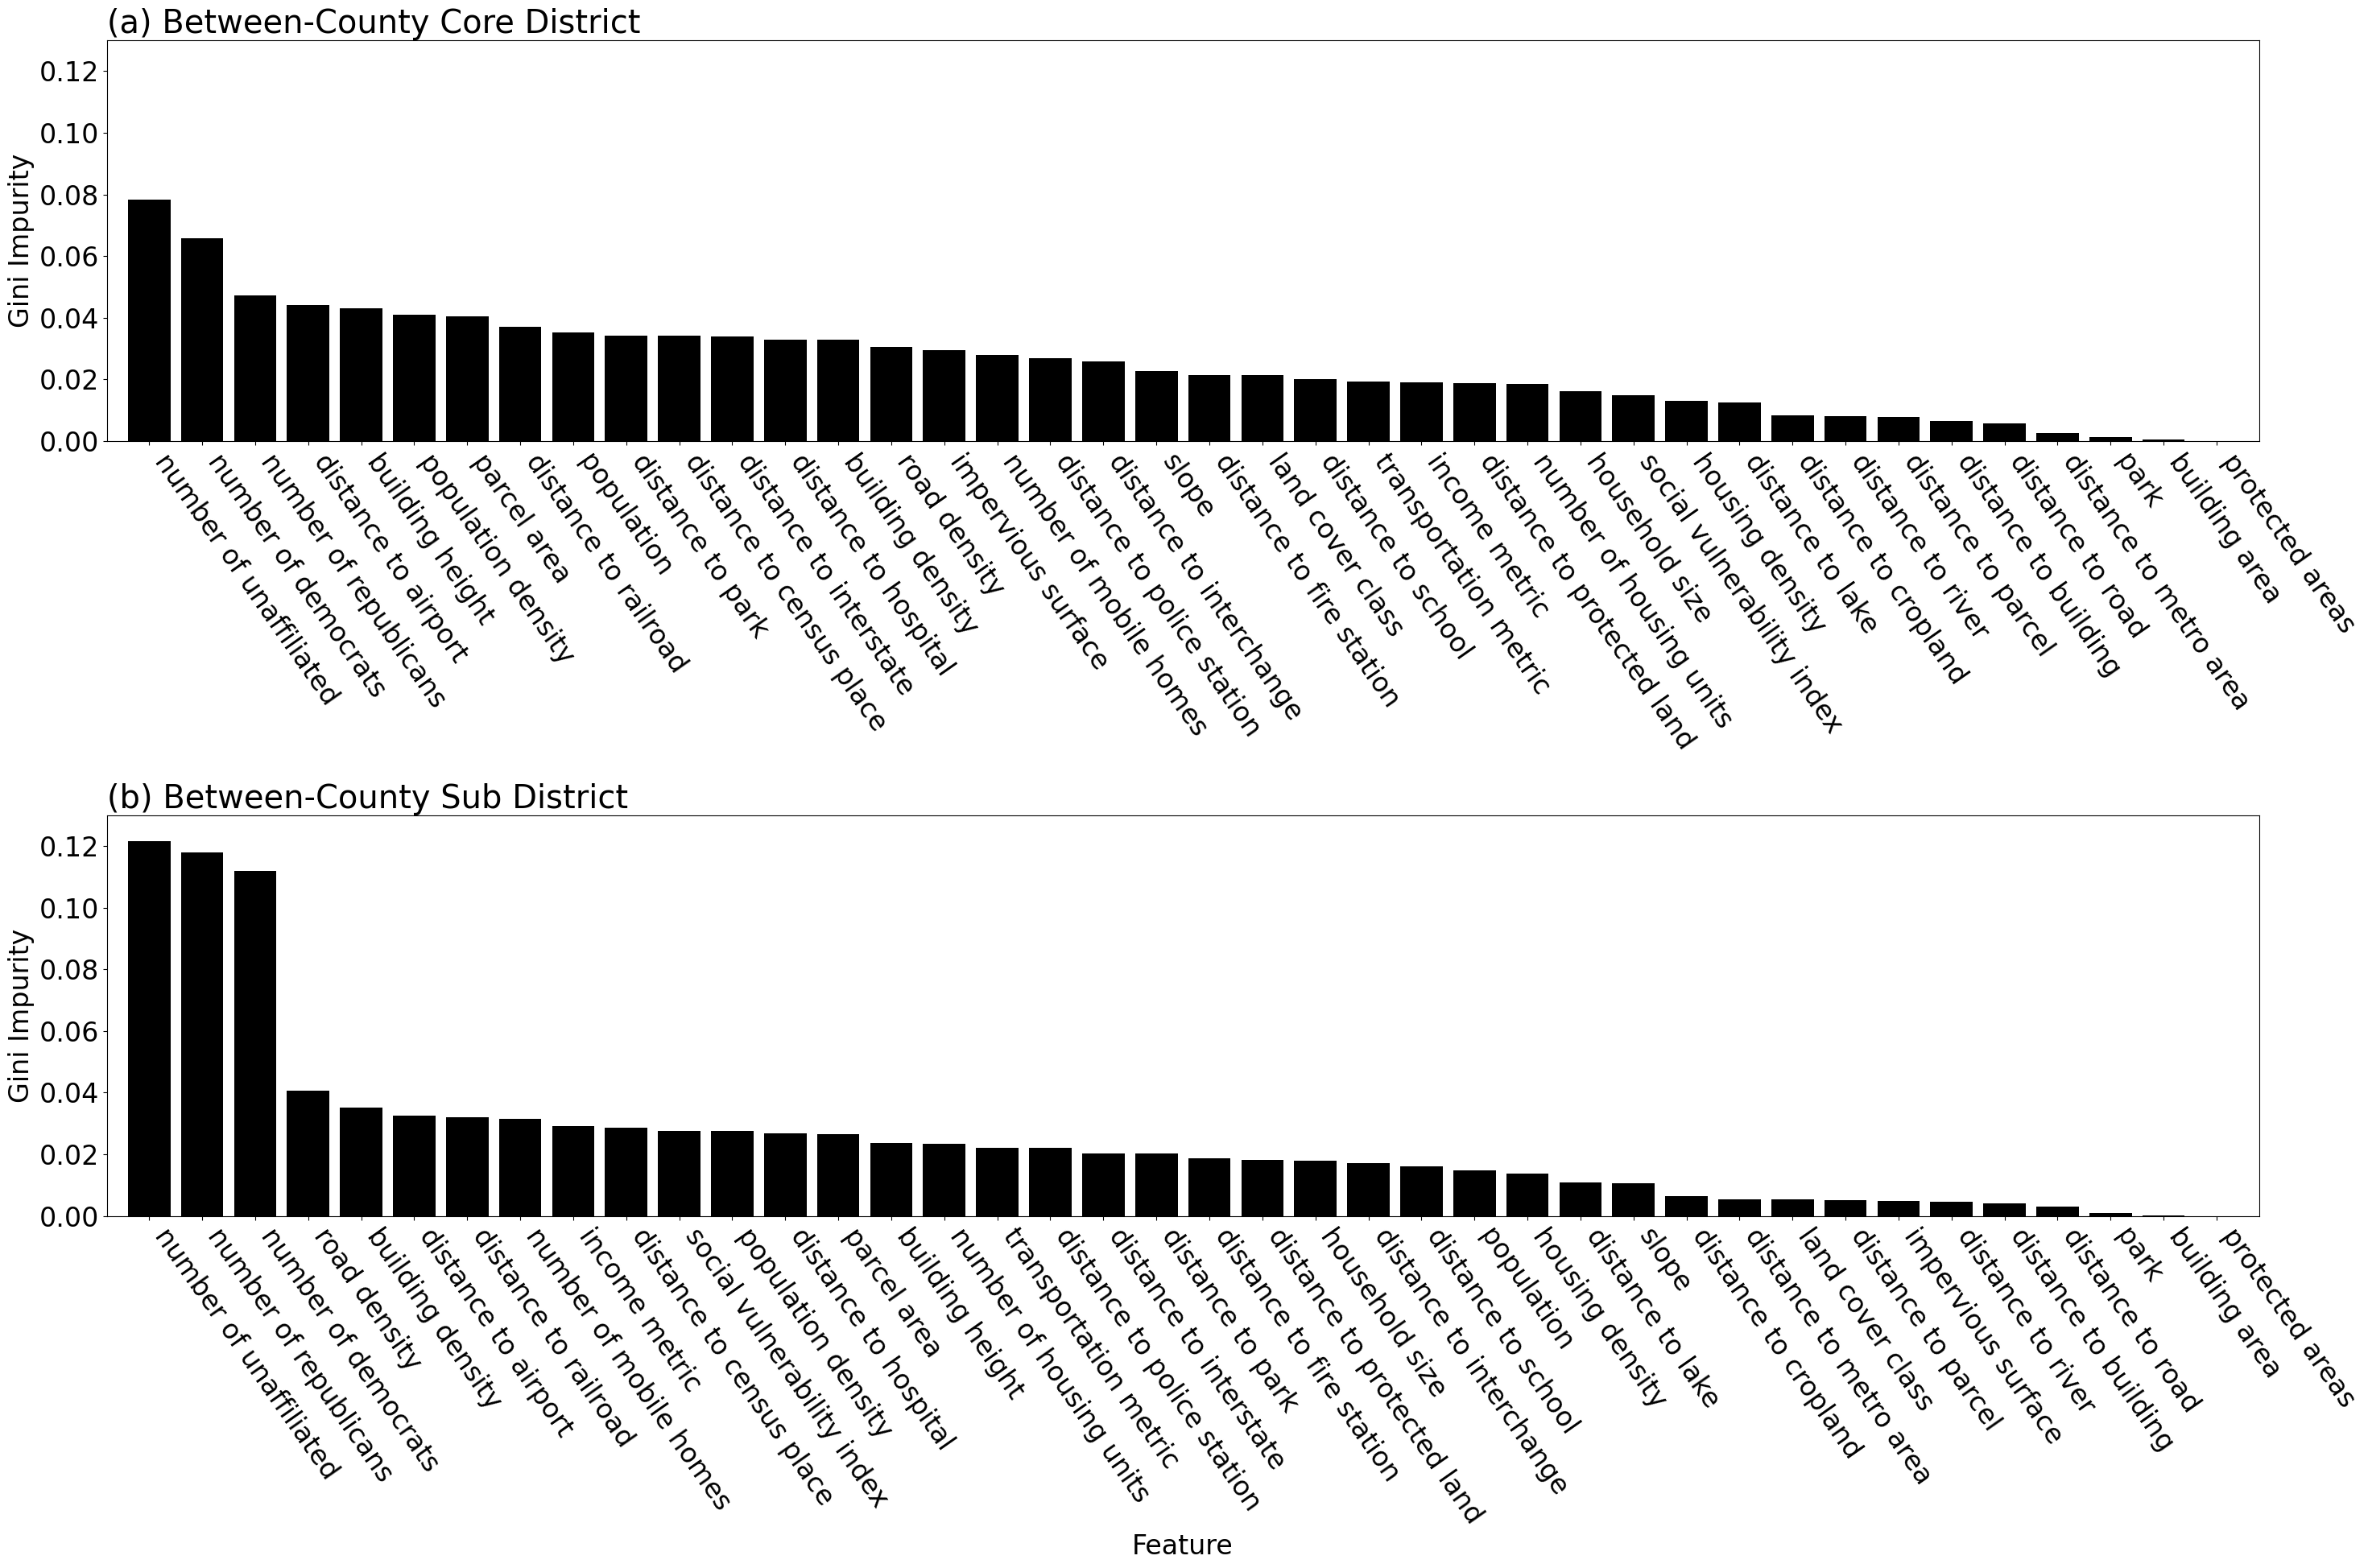

In [204]:
# Between County
# creates fig with 2 subplots
plt.rcParams['font.size'] = '24'
fig, (ax1, ax2) = plt.subplots(2, figsize=(30,20))
## plot dates
ax1.bar(between_core_fi.index, between_core_fi["between_core"], color="black")
ax1.xaxis.set_label_coords(1.05, -0.025)
ax1.set_ylabel("Gini Impurity")
ax1.set_ylim((0,0.13))
ax1.margins(x=0.01)
ax1.set_title("(a) Between-County Core District", loc="left")

ax2.bar(between_sub_fi.index, between_sub_fi["between_sub"], color="black")
ax2.set_xlabel("Feature", loc="center")
ax2.set_ylabel("Gini Impurity")
ax2.set_ylim((0,0.13))
ax2.set_title("(b) Between-County Sub District", loc="left")
ax2.margins(x=0.01)

# rotates labels 
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=-55, ha="left", color="black") 
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=-55, ha="left", color="black") 
plt.tight_layout()
plt.savefig("between_feature_import.png")
plt.show()

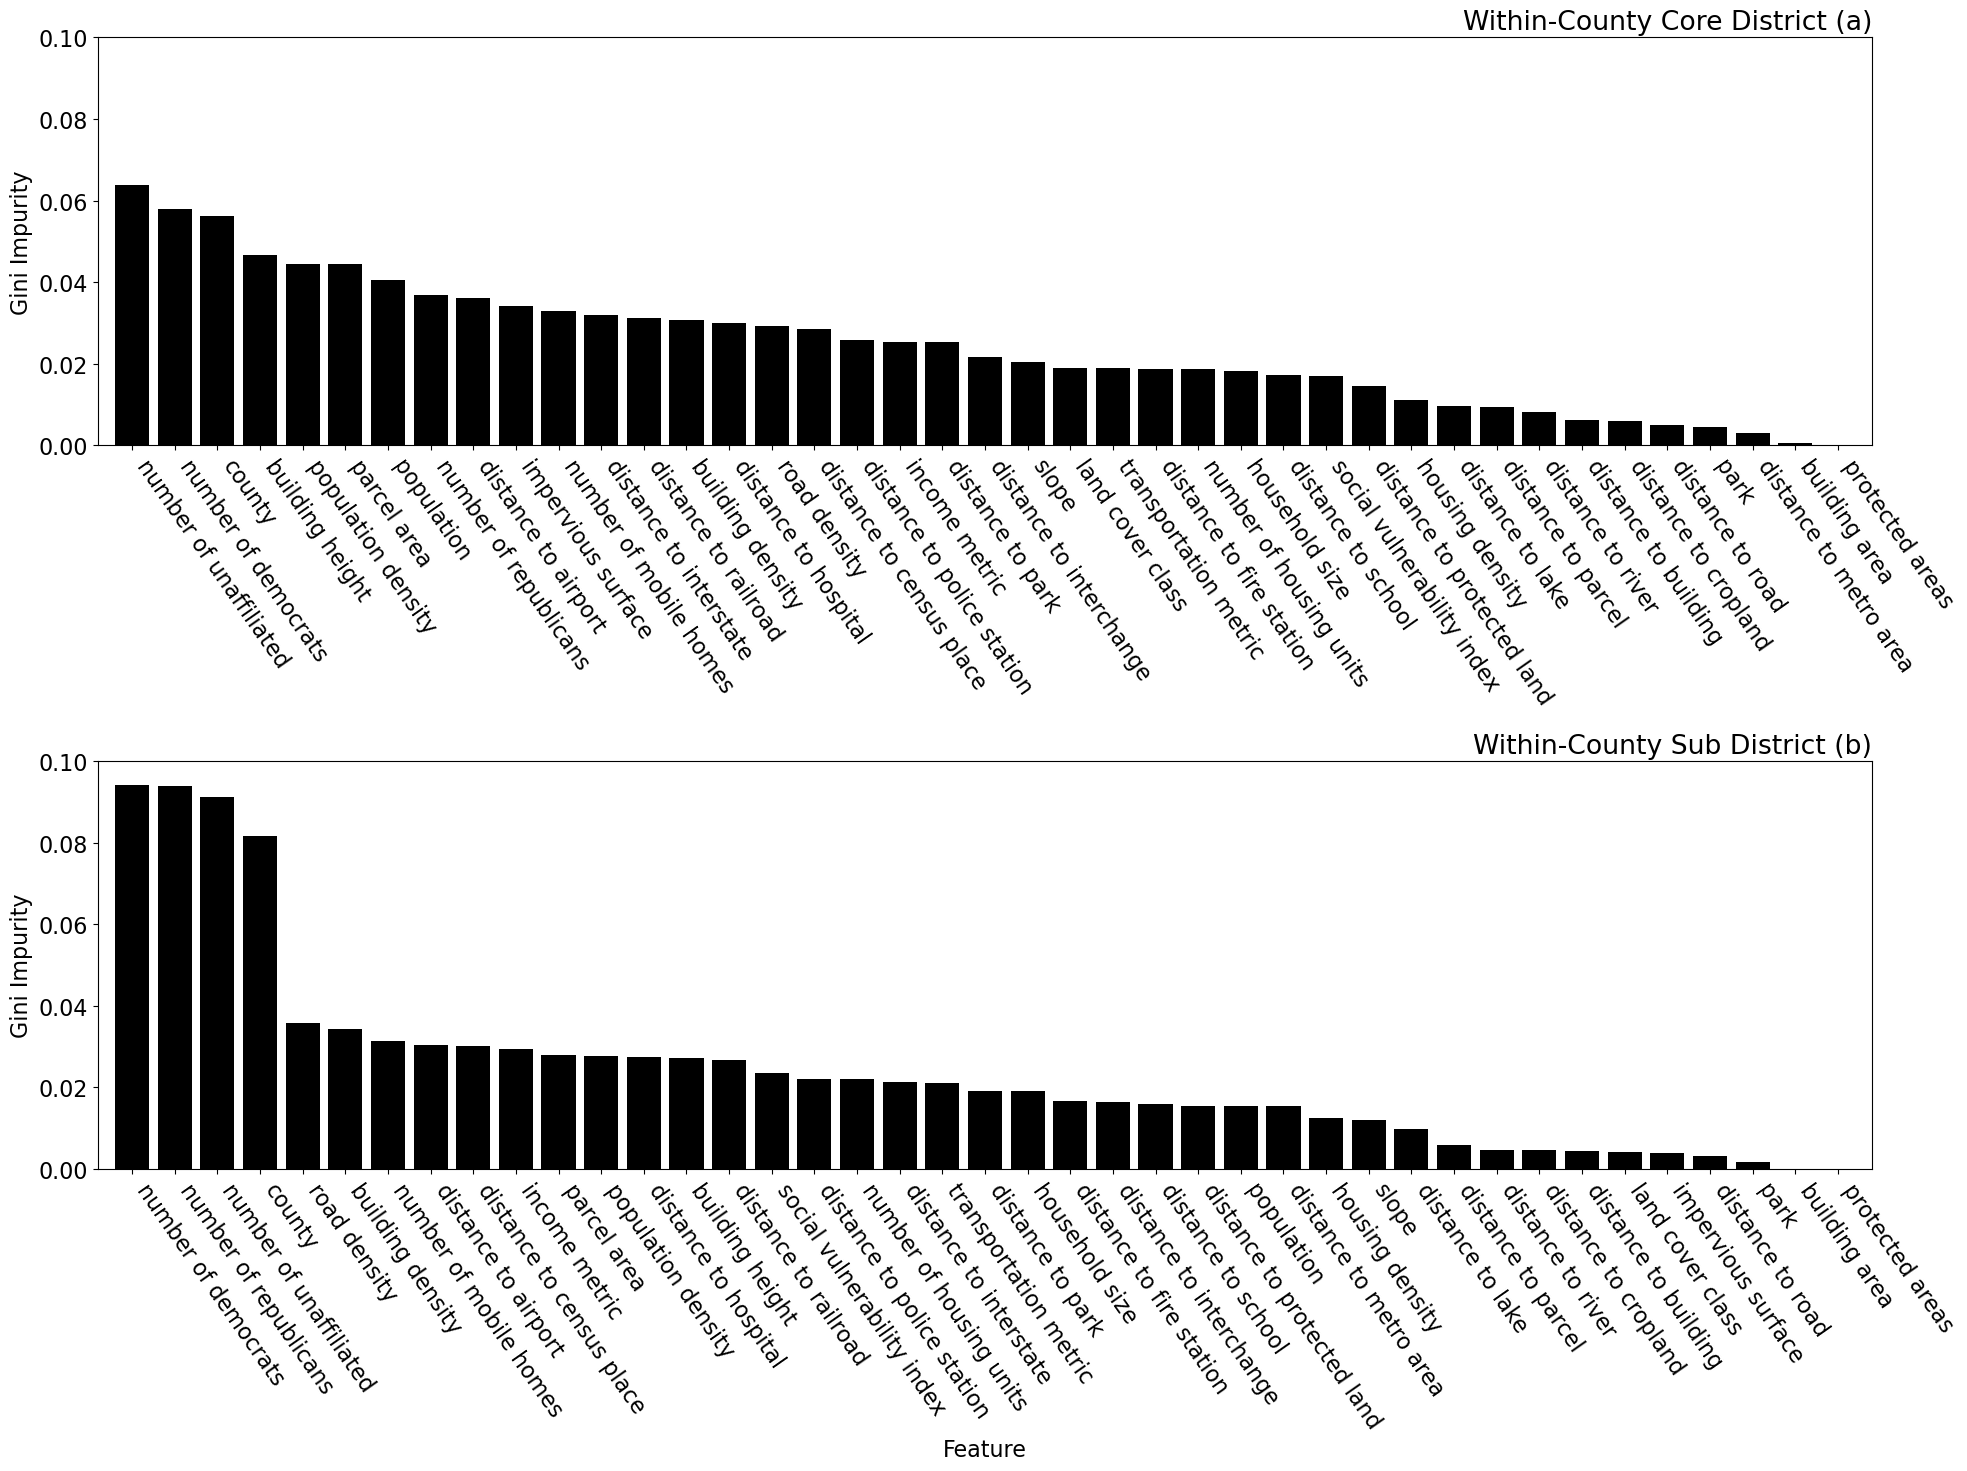

In [183]:
# Within County
# creates fig with 2 subplots
plt.rcParams['font.size'] = '16'
fig, (ax1, ax2) = plt.subplots(2, figsize=(20,15))
## plot dates
ax1.bar(within_core_fi.index, within_core_fi["within_core"], color="black")
ax1.xaxis.set_label_coords(1.05, -0.025)
ax1.set_ylabel("Gini Impurity")
ax1.set_ylim((0,0.1))
ax1.margins(x=0.01)
ax1.set_title("Within-County Core District (a)", loc="right")

ax2.bar(within_sub_fi.index, within_sub_fi["within_sub"], color="black")
ax2.set_xlabel("Feature", loc="center")
ax2.set_ylabel("Gini Impurity")
ax2.set_ylim((0,0.1))
ax2.set_title("Within-County Sub District (b)", loc="right")
ax2.margins(x=0.01)

# rotates labels 
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=-55, ha="left", color="black") 
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=-55, ha="left", color="black") 
plt.tight_layout()
plt.savefig("within_feature_import.png")
plt.show()


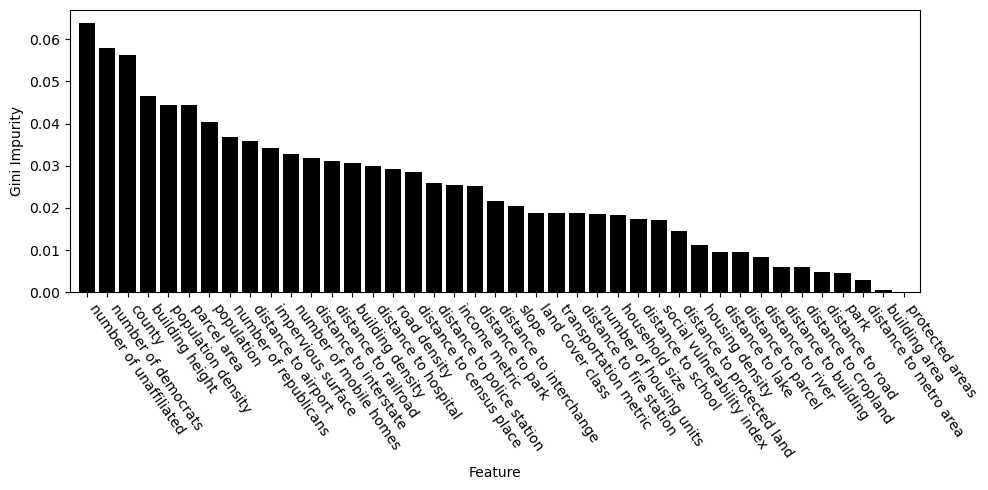

In [138]:
# creates fig with 2 subplots
fig, ax = plt.subplots(figsize=(10,5))
## plot dates
ax.bar(within_core_fi.index, within_core_fi["within_core"], color="black")
ax.set_xlabel("Feature", loc="center")
ax.set_ylabel("Gini Impurity")
# ax.xaxis.set_label_coords(1.05, -0.025)


# rotates labels 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-55, ha="left", color="black") 
plt.margins(x=0.01)
plt.tight_layout()
plt.show()

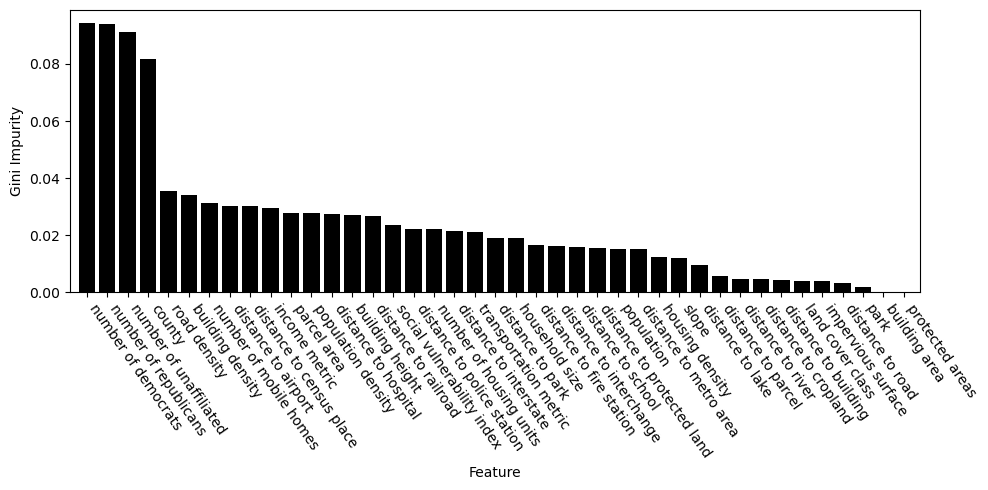

In [136]:
# creates fig with 2 subplots
fig, ax = plt.subplots(figsize=(10,5))
## plot dates
ax.bar(within_sub_fi.index, within_sub_fi["within_sub"], color="black")
ax.set_xlabel("Feature", loc="center")
ax.set_ylabel("Gini Impurity")
# ax.xaxis.set_label_coords(1.05, -0.025)


# rotates labels 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=-55, ha="left", color="black") 
plt.margins(x=0.01)
plt.tight_layout()
plt.show()

<AxesSubplot:>

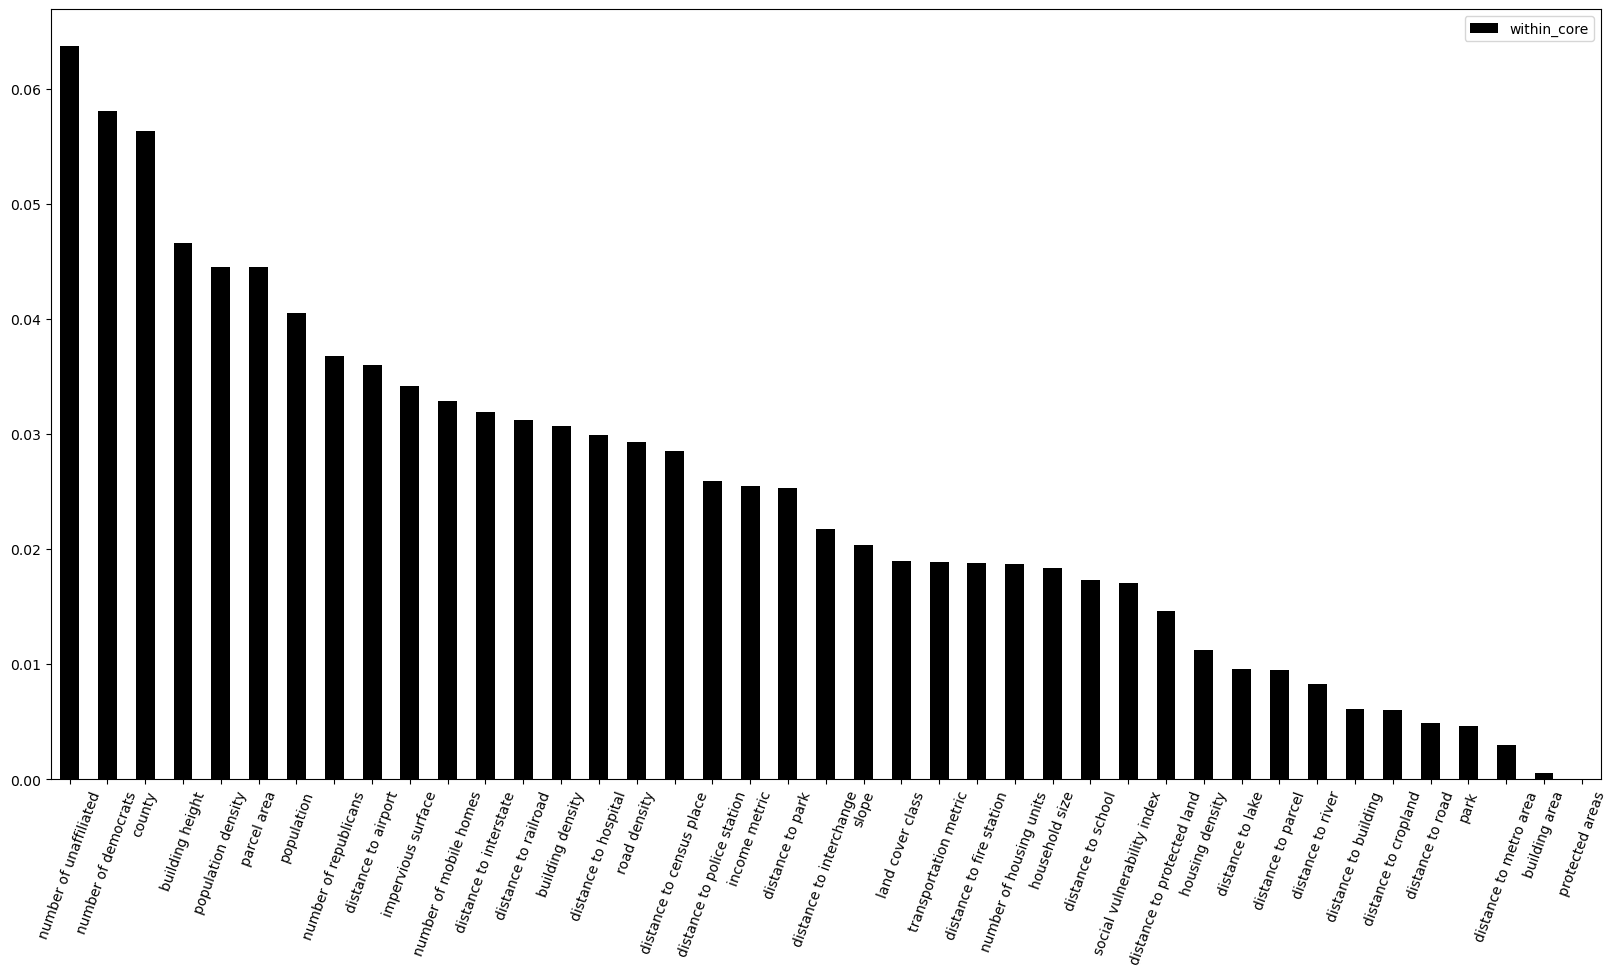

In [106]:
within_core_fi.plot.bar(color="black", rot=70, figsize=(20,10))

Visualize confusion matrix

In [48]:
conf_mat = np.load(os.path.join(file_path, "conf_mat.npy"))
conf_mat_df = pd.DataFrame(conf_mat, columns=col_names, index=col_names)
# dfi.export(conf_mat_df,  os.path.join(file_path, 'conf_mat_df.png'))

In [49]:
conf_mat_df

,100,101,110,120,130,131,200,201,202,203,300,301,302
100,3921,77130,67360,1218,1,6393,6463,7361,508,0,4604,44,0
101,3929,216997,414447,17054,18,73092,11939,15942,676,0,12401,177,0
110,186,62136,1624659,679012,136,1006127,4627,30904,41,0,94098,705,0
120,0,201,317326,881063,32,3708579,537,727,0,0,44022,0,0
130,0,128,4917,55,0,36391,64,742,0,0,10489,0,0
131,0,1854,745064,1604698,295,352801,116,4556,0,0,273668,0,0
200,1543,39611,134759,15097,7,54740,60594,32065,1552,0,901637,1,98
201,354,17398,150839,39579,0,101837,22157,60368,560,0,7373,0,1
202,1915,14710,19091,245,0,11328,8137,3668,3240,0,874,0,19
203,3,3593,97947,834,0,385947,969,65,0,2,66,0,0


Features used in predictions

In [169]:
# between - no county
features = ["building area",
"building density",
"building height",
"distance to cropland",
"distance to building",
"distance to census place",
"distance to airport",
"distance to hospital",
"distance to fire station",
"distance to police station",
"distance to railroad",
"distance to school",
"distance to interchange",
"distance to interstate",
"distance to lake",
"distance to metro area",
"distance to park",
"distance to protected land",
"distance to river",
"distance to road",
"household size",
"transportation metric",
"number of housing units",
"housing density",
"impervious surface",
"income metric",
"number of mobile homes",
"land cover class",
"parcel area",
"distance to parcel",
"park",
"population density",
"population",
"protected areas",
"road density",
"slope",
"social vulnerability index",
"number of democrats",
"number of republicans",
"number of unaffiliated",]

Visualize feature importance

In [69]:
feat_import = np.load(os.path.join(file_path, "feature_import.npy"))
feat_import_df = pd.DataFrame(feat_import, columns=["import"])
feat_import_df.index = features
# feat_import_df = feat_import_df.sort_values(by="import", ascending=False)
feat_import_df = feat_import_df.round(4)
feat_import_df.to_csv("feature_import.csv")
# dfi.export(feat_import_df,  os.path.join(file_path, 'feat_import_df.png'))

In [70]:
feat_import_df

,import
building area,0.0005
building density,0.0329
building height,0.0431
distance to cropland,0.0085
distance to building,0.0065
distance to census place,0.0341
distance to airport,0.0440
distance to hospital,0.0330
distance to fire station,0.0215
distance to police station,0.0269


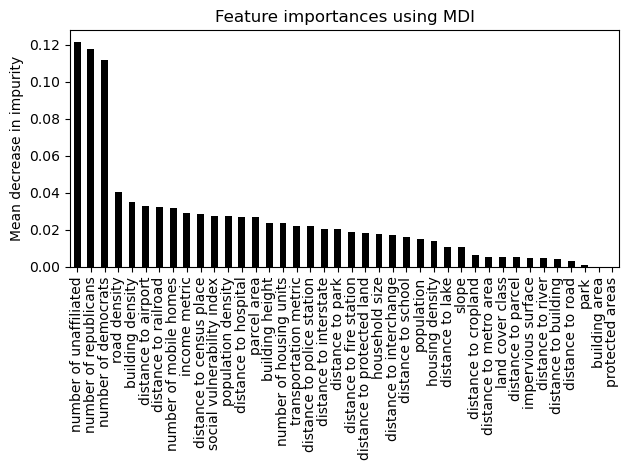

In [51]:
forest_importances = pd.Series(feat_import, index=features)
forest_importances = forest_importances.sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, color=(0,0,0,1))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
fig.savefig(os.path.join(file_path, 'feat_import.png'))

In [19]:
feat_import_df

,import
vote_unaffiliated,0.0984
vote_rep,0.0937
vote_dem,0.0892
NC_county,0.0779
road_density,0.0350
mobile_homes,0.0337
blg_density,0.0322
dist_hzAirportFlty,0.0312
income,0.0303
dist_census_place,0.0283


Visualize class report that summarizes precision, recall, and F1 score

In [5]:
class_report = pd.read_pickle(os.path.join(file_path, "class_report.pkl"))
class_report = class_report.round(4)

In [46]:
class_report = pd.read_pickle(os.path.join(file_path, "class_report.pkl"))
class_report = class_report.round(4)
del class_report['support']
class_report.index = col_names + ['accuracy', 'macro average', 'weighted average']
# dfi.export(class_report, os.path.join(file_path, 'class_report.png'))

In [6]:
class_report

,precision,recall,f1-score,support
100,0.9600,0.9619,0.9610,2.106820e+05
101,0.9697,0.9835,0.9765,7.249320e+05
102,0.9550,0.8984,0.9258,5.798000e+04
110,0.9883,0.9846,0.9864,2.194967e+06
120,0.9885,0.9956,0.9920,3.927307e+06
130,0.9949,0.9928,0.9939,5.337850e+05
131,0.9852,0.9968,0.9910,2.142319e+06
200,0.9762,0.9382,0.9568,4.510580e+05
201,0.9808,0.9492,0.9647,3.606320e+05
202,0.9685,0.9034,0.9348,7.907600e+04
